Taxa overlap of query database with metagnomics taxa from raw metagenomics database

Why we do this:
The raw metagenomics database represents the most comprehensive snapshot of the microbial community present in the sample based on DNA sequencing. By comparing the taxa in our DIAMOND-based protein hits (from custom query databases) to this reference set, we can assess how well our metaproteomics-derived proteins reflect the underlying microbial composition.

What the results imply:

A high overlap indicates that the identified protein taxa are representative of the microbes in the sample.

A low overlap may suggest detection limitations, missing reference proteins, or differences between transcriptomic/proteomic activity and genomic presence.

How we do this:
We load both:

A CSV file of unique taxa detected in the metagenomics DNA reference.

The annotated DIAMOND results which contain organism names from matched protein hits.

We filter by a selected taxonomic rank (e.g., "species") and compute:

Unique taxa in each set.

The intersection and differences between them.

The percentage overlap in both directions (proteomics → genomics and vice versa).

In [23]:
# === File paths ===
# Paste the path of the raw metagenomics taxa CSV file
metagenomics_taxa_csv = r"C:\Users\Yusuf\OneDrive\LST\Derde_jaar\Y3Q4\Metaproteomics_with_db\db_results_analysis\unique_taxa_in_metagendb.csv"

# Paste the path of the query DataFrame CSV file
query_df_csv = r"C:\Users\Yusuf\OneDrive\LST\Derde_jaar\Y3Q4\Metaproteomics_with_db\db_results_analysis\unique_taxa_in_merged_pept2lca.csv"

# Give a label for the query DataFrame
query_db_label = "Pept2lca hits dataframe"

# === CONFIGURATION ===
# Choose a taxonomic rank (e.g., strain", "species", "genus", etc.)
# Set to None to compare all taxa regardless of rank
selected_rank = "genus"  # ← modify this line only

In [24]:
import pandas as pd

# === Load and filter metagenomics taxa ===
df_meta = pd.read_csv(metagenomics_taxa_csv)
if selected_rank:
    df_meta = df_meta[df_meta["rank"] == selected_rank]
meta_taxa = set(df_meta["taxon_name"])

# === Load and filter DIAMOND-based taxa ===
df_query = pd.read_csv(query_df_csv)
if selected_rank:
    df_query = df_query[df_query["taxonomy_rank"] == selected_rank]
query_taxa = set(df_query["organism"])

# === Compare sets ===
query_in_meta = query_taxa & meta_taxa
query_not_in_meta = query_taxa - meta_taxa

meta_in_query = meta_taxa & query_taxa
meta_not_in_query = meta_taxa - query_taxa

# === Print results ===
print(f"Total unique {selected_rank} taxa in {query_db_label}: {len(query_taxa)}")
print(f"{query_db_label} taxa found in metagenomics raw DB ({selected_rank or 'all ranks'}): {len(query_in_meta)}")
print(f"{query_db_label} taxa NOT found in metagenomics raw DB ({selected_rank or 'all ranks'}): {len(query_not_in_meta)}")
print(f"Percentage of {query_db_label} taxa found: "
      f"{(len(query_in_meta) / len(query_taxa)) * 100:.2f}%" if query_taxa else "0.00%")

print(f"\nTotal unique {selected_rank} taxa in metagenomics: {len(meta_taxa)}")
print(f"Metagenomics raw DB taxa found in {query_db_label} ({selected_rank or 'all ranks'}): {len(meta_in_query)}")
print(f"Metagenomics raw DB taxa NOT found in {query_db_label} ({selected_rank or 'all ranks'}): {len(meta_not_in_query)}")
print(f"Percentage of raw metagenomics taxa found in {query_db_label}: "
      f"{(len(meta_in_query) / len(meta_taxa)) * 100:.2f}%" if meta_taxa else "0.00%")


Total unique genus taxa in Pept2lca hits dataframe: 7
Pept2lca hits dataframe taxa found in metagenomics raw DB (genus): 6
Pept2lca hits dataframe taxa NOT found in metagenomics raw DB (genus): 1
Percentage of Pept2lca hits dataframe taxa found: 85.71%

Total unique genus taxa in metagenomics: 1003
Metagenomics raw DB taxa found in Pept2lca hits dataframe (genus): 6
Metagenomics raw DB taxa NOT found in Pept2lca hits dataframe (genus): 997
Percentage of raw metagenomics taxa found in Pept2lca hits dataframe: 0.60%


Taxa overlap of Diamond database psm's, genus database psm's and garmerwolde metagnomics database psm's 

In [ ]:
# === File paths ===
# Paste the path of the metagenomics PSM taxa CSV file
metagenomics_psm_taxa_csv = r"C:\Users\Yusuf\OneDrive\LST\Derde_jaar\Y3Q4\Metaproteomics_with_db\Community_comparisons\metagenomics_psm_taxa_annotated.csv"

# Paste the path of the first query DataFrame CSV file
diamond_df_csv = r"C:\Users\Yusuf\OneDrive\LST\Derde_jaar\Y3Q4\Metaproteomics_with_db\Community_comparisons\diamond_from_proteomes_clust95_psm.csv"
genus_df_csv = r"C:\Users\Yusuf\OneDrive\LST\Derde_jaar\Y3Q4\Metaproteomics_with_db\Community_comparisons\genus_composition_psm.csv"

# Give a label for the query DataFrame
query_db_label = "Pept2lca hits dataframe"

# === CONFIGURATION ===
# Choose a taxonomic rank (e.g., "strain", "species", "genus", etc.)
# Set to None to compare all taxa regardless of rank
selected_rank = "genus"  # ← modify this line only


--- Taxonomic Rank: class ---
Metagenomics PSM:  10 taxa
DIAMOND DB:        182 taxa
Pept2LCA Genus DB: 2 taxa


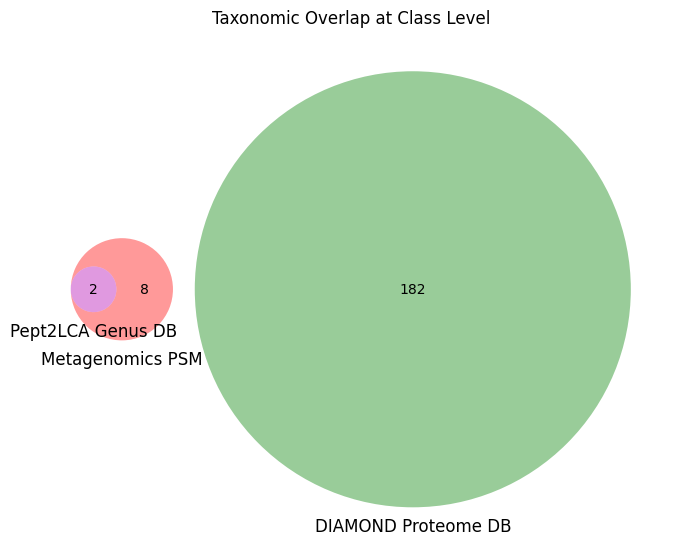


--- Taxonomic Rank: domain ---
Metagenomics PSM:  2 taxa
DIAMOND DB:        10 taxa
Pept2LCA Genus DB: 1 taxa


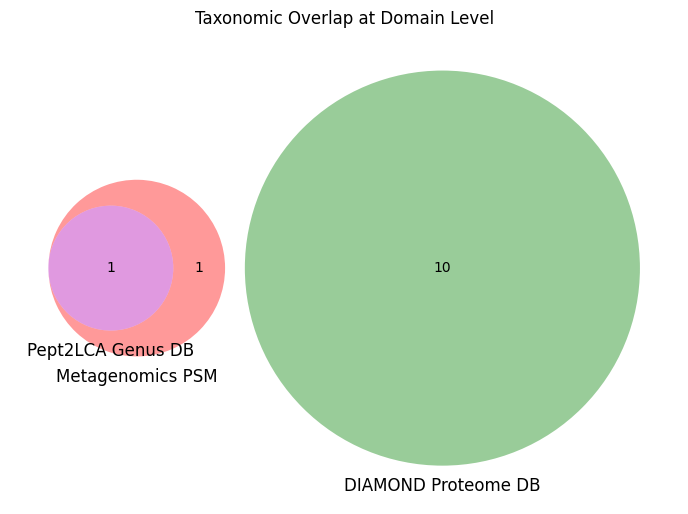


--- Taxonomic Rank: exact match ---
Metagenomics PSM:  0 taxa
DIAMOND DB:        0 taxa
Pept2LCA Genus DB: 0 taxa

--- Taxonomic Rank: family ---
Metagenomics PSM:  30 taxa
DIAMOND DB:        9 taxa
Pept2LCA Genus DB: 0 taxa


C:\Users\Yusuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib_venn\layout\venn3\pairwise.py:111: UserWarning: Circle C has zero area.
  warnings.warn("Circle C has zero area.")


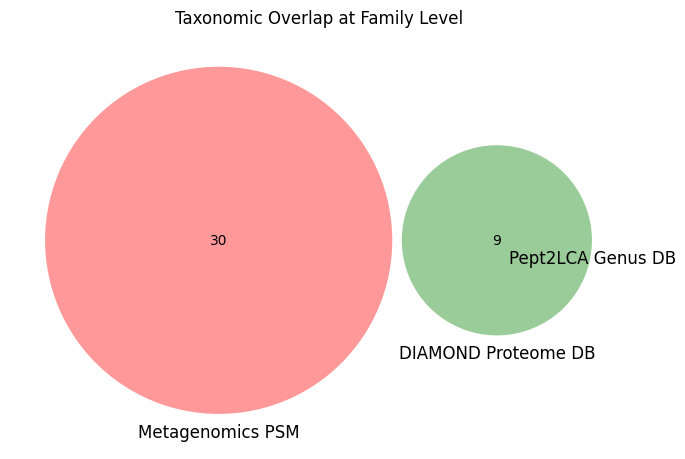


--- Taxonomic Rank: genus ---
Metagenomics PSM:  37 taxa
DIAMOND DB:        194 taxa
Pept2LCA Genus DB: 5 taxa


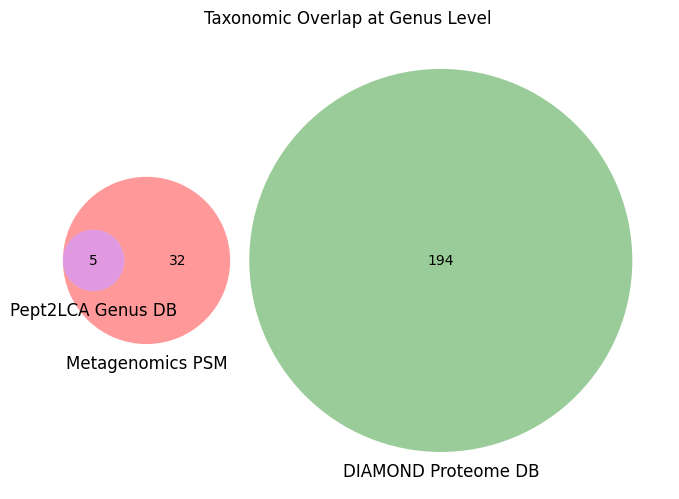


--- Taxonomic Rank: kingdom ---
Metagenomics PSM:  0 taxa
DIAMOND DB:        17 taxa
Pept2LCA Genus DB: 1 taxa


C:\Users\Yusuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib_venn\layout\venn3\pairwise.py:103: UserWarning: Circle A has zero area.
  warnings.warn("Circle A has zero area.")


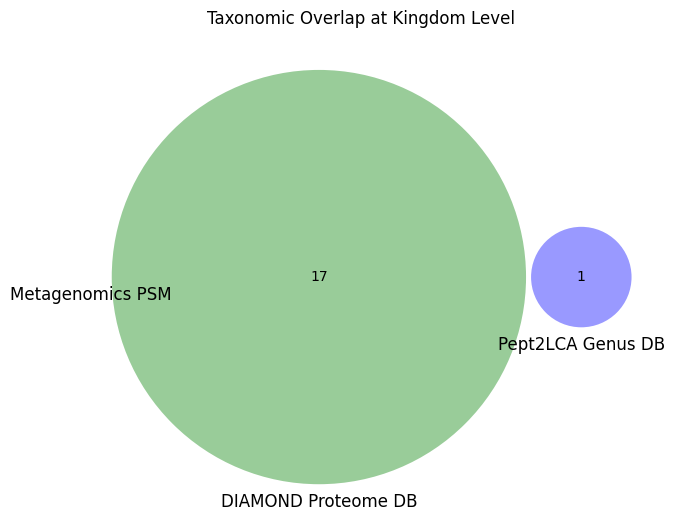


--- Taxonomic Rank: no rank ---
Metagenomics PSM:  0 taxa
DIAMOND DB:        86 taxa
Pept2LCA Genus DB: 1 taxa


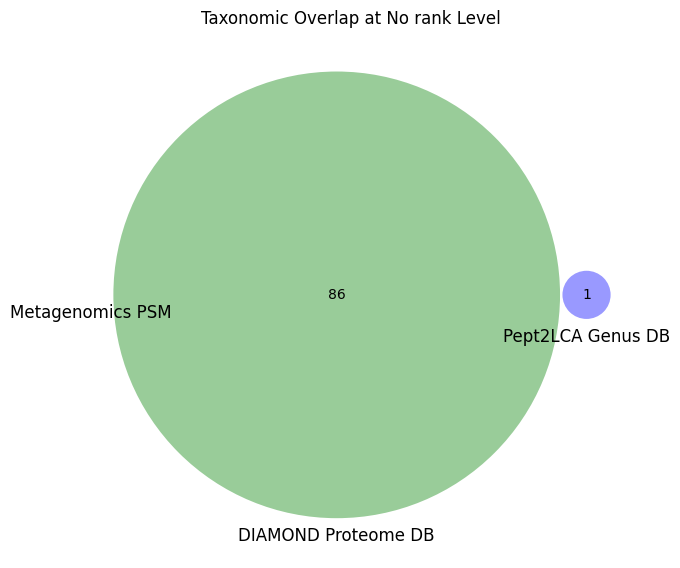


--- Taxonomic Rank: order ---
Metagenomics PSM:  20 taxa
DIAMOND DB:        7 taxa
Pept2LCA Genus DB: 1 taxa


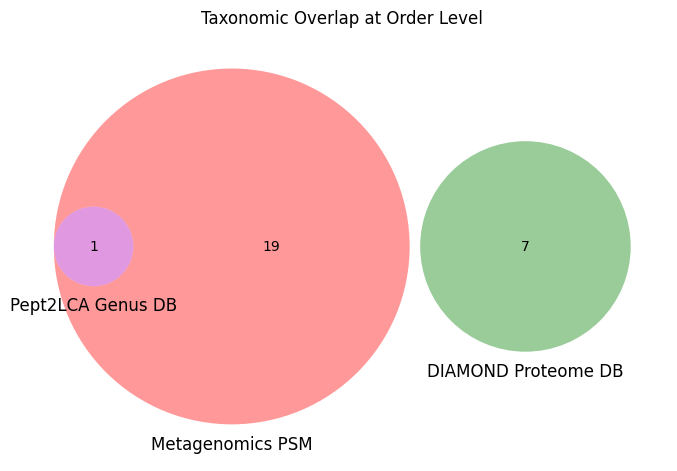


--- Taxonomic Rank: phylum ---
Metagenomics PSM:  10 taxa
DIAMOND DB:        48 taxa
Pept2LCA Genus DB: 1 taxa


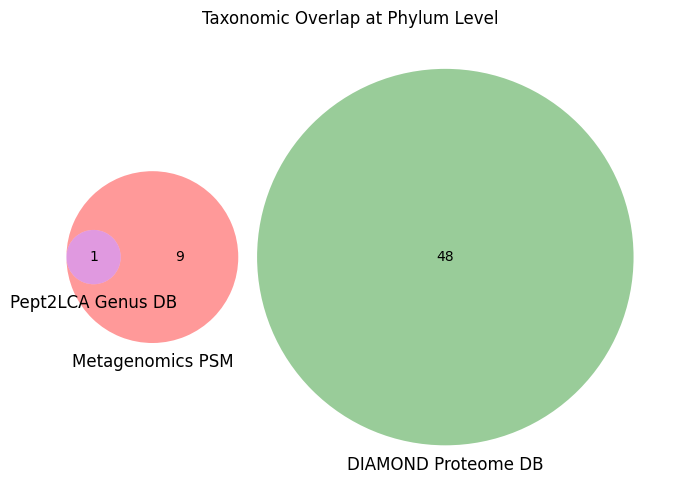


--- Taxonomic Rank: species ---
Metagenomics PSM:  152 taxa
DIAMOND DB:        217 taxa
Pept2LCA Genus DB: 51 taxa


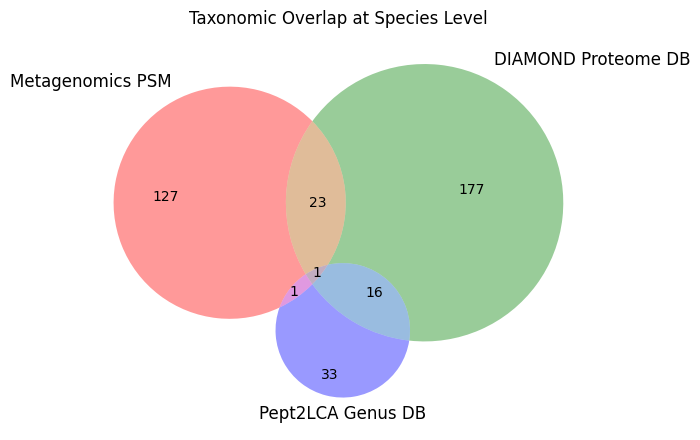


--- Taxonomic Rank: strain ---
Metagenomics PSM:  0 taxa
DIAMOND DB:        23 taxa
Pept2LCA Genus DB: 4 taxa


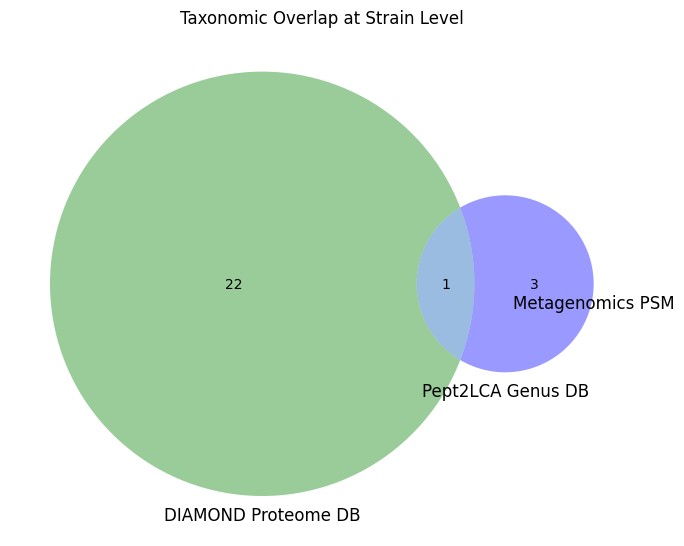

In [8]:
import pandas as pd
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# === File paths ===
metagenomics_psm_taxa_csv = r"C:\Users\Yusuf\OneDrive\LST\Derde_jaar\Y3Q4\Metaproteomics_with_db\Community_comparisons\metagenomics_psm_taxa_annotated.csv"
diamond_df_csv = r"C:\Users\Yusuf\OneDrive\LST\Derde_jaar\Y3Q4\Metaproteomics_with_db\Community_comparisons\diamond_from_proteomes_clust95_psm.csv"
genus_df_csv = r"C:\Users\Yusuf\OneDrive\LST\Derde_jaar\Y3Q4\Metaproteomics_with_db\Community_comparisons\genus_composition_psm.csv"

# === Load data ===
df_meta = pd.read_csv(metagenomics_psm_taxa_csv)
df_diamond = pd.read_csv(diamond_df_csv)
df_genusdb = pd.read_csv(genus_df_csv)

# === Standardize rank column names across files ===
meta_rank_col = "taxon_rank"
diamond_rank_col = "lca rank"
genusdb_rank_col = "lca rank"

meta_name_col = "taxon_name"
diamond_name_col = "Taxon names"
genusdb_name_col = "lca"

# === Determine all taxonomic ranks to evaluate ===
all_ranks = sorted(set(df_meta[meta_rank_col].dropna().unique())
                   | set(df_diamond[diamond_rank_col].dropna().unique())
                   | set(df_genusdb[genusdb_rank_col].dropna().unique()))

# === Loop through all available ranks ===
for rank in all_ranks:
    print(f"\n--- Taxonomic Rank: {rank} ---")

    # === Extract taxa for current rank ===
    meta_set = set(df_meta.loc[df_meta[meta_rank_col] == rank, meta_name_col].dropna().unique())
    diamond_set = set(df_diamond.loc[df_diamond[diamond_rank_col] == rank, diamond_name_col].dropna().unique())
    genusdb_set = set(df_genusdb.loc[df_genusdb[genusdb_rank_col] == rank, genusdb_name_col].dropna().unique())

    # === Report counts ===
    print(f"Metagenomics PSM:  {len(meta_set)} taxa")
    print(f"DIAMOND DB:        {len(diamond_set)} taxa")
    print(f"Pept2LCA Genus DB: {len(genusdb_set)} taxa")

    # === Skip if no data to plot ===
    if not (meta_set or diamond_set or genusdb_set):
        continue

    # === Plot ===
    plt.figure(figsize=(7, 7))
    venn3([meta_set, diamond_set, genusdb_set],
          set_labels=("Metagenomics PSM", "DIAMOND Proteome DB", "Pept2LCA Genus DB"))
    plt.title(f"Taxonomic Overlap at {rank.capitalize()} Level")
    plt.tight_layout()
    plt.show()


--- Taxon Name Overlap (All Ranks Combined) ---
Metagenomics PSM:  261 unique taxa
DIAMOND DB:        793 unique taxa
Pept2LCA Genus DB: 67 unique taxa


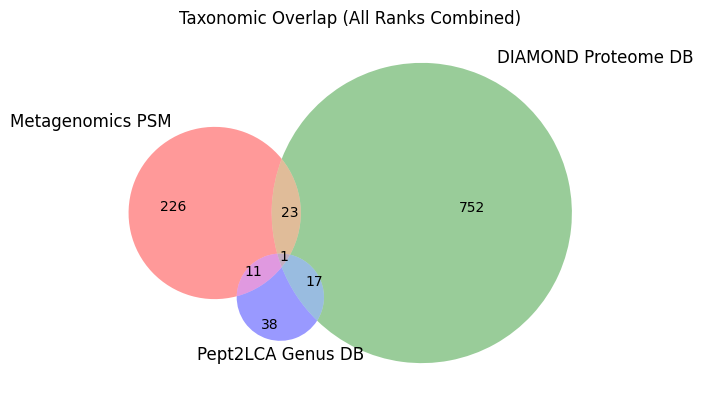

In [9]:
import pandas as pd
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# === File paths ===
metagenomics_psm_taxa_csv = r"C:\Users\Yusuf\OneDrive\LST\Derde_jaar\Y3Q4\Metaproteomics_with_db\Community_comparisons\metagenomics_psm_taxa_annotated.csv"
diamond_df_csv = r"C:\Users\Yusuf\OneDrive\LST\Derde_jaar\Y3Q4\Metaproteomics_with_db\Community_comparisons\diamond_from_proteomes_clust95_psm.csv"
genus_df_csv = r"C:\Users\Yusuf\OneDrive\LST\Derde_jaar\Y3Q4\Metaproteomics_with_db\Community_comparisons\genus_composition_psm.csv"

# === Load data ===
df_meta = pd.read_csv(metagenomics_psm_taxa_csv)
df_diamond = pd.read_csv(diamond_df_csv)
df_genusdb = pd.read_csv(genus_df_csv)

# === Extract all unique taxon names regardless of rank ===
meta_taxa = set(df_meta["taxon_name"].dropna().unique())
diamond_taxa = set(df_diamond["Taxon names"].dropna().unique())
genusdb_taxa = set(df_genusdb["lca"].dropna().unique())

# === Print counts ===
print("--- Taxon Name Overlap (All Ranks Combined) ---")
print(f"Metagenomics PSM:  {len(meta_taxa)} unique taxa")
print(f"DIAMOND DB:        {len(diamond_taxa)} unique taxa")
print(f"Pept2LCA Genus DB: {len(genusdb_taxa)} unique taxa")

# === Plot Venn diagram ===
plt.figure(figsize=(7, 7))
venn3([meta_taxa, diamond_taxa, genusdb_taxa],
      set_labels=("Metagenomics PSM", "DIAMOND Proteome DB", "Pept2LCA Genus DB"))
plt.title("Taxonomic Overlap (All Ranks Combined)")
plt.tight_layout()
plt.show()


#### Taxonomic Coverage Across All Ranks

The Venn diagram above illustrates the overlap in taxon names (regardless of taxonomic rank) between the metagenomics-derived PSMs, the DIAMOND proteome database, and the Pept2LCA-derived genus database.

- **DIAMOND DB** contributed the most taxon names overall, with **793 unique taxa**, reflecting the broad coverage of this comprehensive reference database.
- The **Metagenomics PSM** dataset identified **261 taxa**, representing the taxa actually observed from the environmental sample based on metagenomics-informed peptide-spectrum matches.
- The **Pept2LCA Genus DB**, which is a smaller targeted reference derived from de novo peptide matches, contained only **67 unique taxa**.

#### Overlap and Agreement

- A total of **23 taxa** were shared between the **Metagenomics PSM** and **DIAMOND DB**, suggesting limited direct agreement between database reference content and sample-derived identifications.
- Only **1 taxon** was shared by **all three databases**, highlighting the challenge of obtaining a consistent taxonomic picture across pipelines and tools.
- Notably, **38 of the 67 taxa** in the **Pept2LCA Genus DB** were exclusive to it (i.e. not found in DIAMOND or the metagenomics data), indicating potential false positives or rare taxa captured only by de novo matching.
- The metagenomics PSM dataset had the largest number of unique (non-overlapping) taxa (**226**), which might reflect its high specificity to the sample or limitations in taxon annotation completeness in the other databases.

#### Implications for Coverage and False Positives

- **DIAMOND DB's broad coverage** is beneficial for maximizing sensitivity, but the large number of unique taxa (**752**) raises concern for **potential false positives**, especially if no overlap exists with metagenomic evidence.
- **Pept2LCA DB** shows strong **complementarity**, capturing taxa that are underrepresented in DIAMOND or metagenomic matches, but its limited overlap suggests either **lower coverage** or **overfitting to noise** from de novo peptides.
- The **Metagenomics PSM dataset** serves as a reference ground truth, and its overlap with other databases can be interpreted as a proxy for **validation**: low overlap may imply **database mismatches** or **annotation bottlenecks**.

#### Conclusion

These results emphasize the **importance of database choice** and cross-validation when interpreting metaproteomics data. Although DIAMOND provides extensive coverage, overlap with actual sample-derived evidence is relatively low. Meanwhile, Pept2LCA offers complementary insights, yet with limited agreement across sources. This analysis supports a hybrid approach where databases are tuned and validated using matched metagenomics data to ensure both coverage and precision in taxonomic assignments.
